# KISHÁZI

A folyamat elejét az órai anyaghoz hasonlóan összeraktuk, a befejezés a cél, azaz háromfajta modell és legalább 10 változó alapján történő modellezés, a lehető legjobb megoldás megtalálása

__FONTOS__: Első lépésben készíts egy másolatot erről a notebookról, és nevezd át a neptunkódodra. Másolás módja: File menü: "Make a copy..." parancs, átnevezés: kattints az új címre, akkor editálhatóvá válik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as P

from sklearn.cross_validation import KFold as cval
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline



C:\Users\noa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Adatok betöltése

In [2]:
#Adatok beolvasasa, nezzuk meg meg milyen formatumokat lehet (shift kiegeszites)

df = pd.read_csv('caravan_withname.txt',sep="\t")

In [3]:
#Elso 5 sor lekerdezese
df.head()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


# 1. FELADAT - Eloszlasok megfigyelése

Nézzük meg két változó eloszlását, alapstatisztikáját. Vizsgáljuk meg a célváltozót (utolsó oszlop, "CARAVAN"), a második oszlopot, ami azt mutatja hány háza van az illetőnek (MAANTHUI).

Ehhez használjuk az alábbi példakódokat


In [4]:
#Egyetlegn oszlopnyi adat statisztikáját megkapjuk, ha használjuk a .describe() tagfüggvényt. ALEVEN változó 
# az életbiztosítások számát mutatja meg.

#ALEVEN oszlop kivalasztasa, majd utolso 10 soranak kiirasa
df["ALEVEN"].tail(10)

5812    0
5813    0
5814    0
5815    0
5816    0
5817    2
5818    0
5819    0
5820    0
5821    0
Name: ALEVEN, dtype: int64

In [5]:
# Alapstatisztikak gyors kiszamitasa
df["ALEVEN"].describe()

count    5822.000000
mean        0.076606
std         0.377569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: ALEVEN, dtype: float64

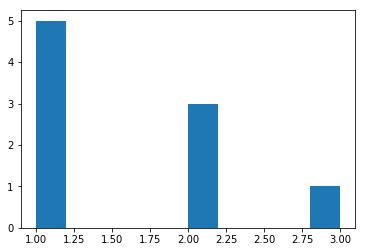

In [6]:
#Gyorsan lehet hisztogrammot rajzolni, az alabbi modon
x=[1,1,1,1,1,2,2,2,3]
plt.hist(x)
plt.show()


Megoldás:

In [7]:
valtozo = "MAANTHUI"

In [8]:
df[valtozo].describe()

count    5822.000000
mean        1.110615
std         0.405842
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: MAANTHUI, dtype: float64

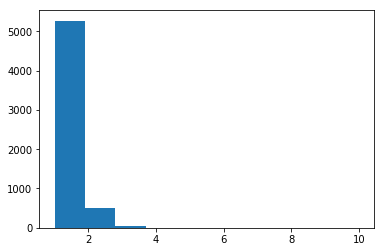

In [9]:
plt.hist(df[valtozo])
plt.show()

## 1. Megoldás

In [10]:
df["CARAVAN"].head()

0    0
1    0
2    0
3    0
4    0
Name: CARAVAN, dtype: int64

In [11]:
df["CARAVAN"].describe()

count    5822.000000
mean        0.059773
std         0.237087
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CARAVAN, dtype: float64

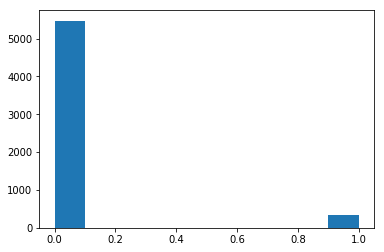

In [12]:
plt.hist(df["CARAVAN"])
plt.show()

# 2. feladat - Első modellépítés



Vágjuk két részre a fenti adathalmazt véletlenszerűen fele-felére, majd az adatok egyik felén tanítsunk be egy logisztikus regressziós modellt úgy, hogy a bemenő változókból csak az első 3-at használjuk, majd a másik felén nézzük meg, milyen pontos a modellünk: számojuk ki annak találati pontosságát (accuracy), illetve ROC görbéjének AUC értékét.

Ehhez az alábbi példákódokat használhatjuk fel.

In [13]:
#Szétválasztást segíti az train_test_split függvény, az alabbi peldabol megsejtheto mukodese
X=df[  ['MOSTYPE', 'MAANTHUI']   ]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print ("Size of X_train= "+str(len(X_train)))
print ("Size of Y_train= "+str(len(Y_train)))
print ("Size of X_test= "+str(len(X_test)))
print ("Size of Y_test= "+str(len(Y_test)))



Size of X_train= 3900
Size of Y_train= 3900
Size of X_test= 1922
Size of Y_test= 1922


In [14]:
#Logisztikus regresszio eseten alapvetoen harom fo lepes a lenyeges, a deklaracioja, a tanitasa (fit() tagfuggveny)
# es az alkalmazo fuggvenye, amit predictnek hivunk predict()

In [15]:
model = linear_model.LogisticRegression(C=1e5)

In [16]:
model.fit(X_train,Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
results=model.predict(X_test)
results[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
#Mintha mindenkit 0-ra tippelne a rendszer, valoban igy van-e?
dfres=pd.DataFrame(results,columns=["Tipp"])
dfres['Tipp'].describe()

count    1922.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Tipp, dtype: float64

In [19]:
#Az egyes tippek valoszinusege is kiszedheto
result_prob=model.predict_proba(X_test)
result_prob[:5]

array([[0.94698022, 0.05301978],
       [0.96004342, 0.03995658],
       [0.96206133, 0.03793867],
       [0.95682265, 0.04317735],
       [0.95899627, 0.04100373]])

In [20]:
#Es pandas dataframe-me alakithato
dfresults=pd.DataFrame(result_prob,columns=["Prob_0","Prob_1"])
dfresults.head()

,Prob_0,Prob_1
0,0.946980,0.053020
1,0.960043,0.039957
2,0.962061,0.037939
3,0.956823,0.043177
4,0.958996,0.041004


In [21]:
# Es akkor a kiertekeles modja
y_pred = [0, 2, 1, 3, 0]
y_true = [0, 1, 2, 3, 0]
accuracy_score(y_true, y_pred)

0.6

In [22]:
# Es akkor a kiertekeles modja
y_true = [1, 1, 1, 0, 0]
y_pred = [0.8, 0.6, 0.5, 0.4, 0.2]
auc_score(y_true, y_pred)

1.0

Megoldas:

In [23]:
X=df[  ['MOSTYPE', 'MAANTHUI', 'MGEMOMV']   ]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


In [24]:
model = linear_model.LogisticRegression(C=1e5)

In [25]:
model.fit(X_train,Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
result_prob=model.predict_proba(X_test)
result_prob[:5]

array([[0.9583943 , 0.0416057 ],
       [0.95885685, 0.04114315],
       [0.95507428, 0.04492572],
       [0.96130812, 0.03869188],
       [0.95774098, 0.04225902]])

In [27]:
results=model.predict(X_test)
results[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [28]:
acc=accuracy_score(Y_test, results)
acc

0.9364479560288561

In [29]:
dfresults=pd.DataFrame(result_prob,columns=["Prob_0","Prob_1"])
auc_score(Y_test, dfresults["Prob_1"])

0.5543455414328489

##  2. Megoldás

Kipróbáljuk a modelt az összes bemeneti változóra.

In [30]:
X=df[  ['MOSTYPE', 'MAANTHUI']   ]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [31]:
model = linear_model.LogisticRegression(C=1e5)

In [32]:
model.fit(X_train,Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [33]:
result_prob=model.predict_proba(X_test)
result_prob[:5]

array([[0.94706977, 0.05293023],
       [0.96076641, 0.03923359],
       [0.9628614 , 0.0371386 ],
       [0.95741016, 0.04258984],
       [0.95967684, 0.04032316]])

In [34]:
results=model.predict(X_test)
results[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [35]:
acc2=accuracy_score(Y_test, results)
acc2

0.9364479560288561

In [36]:
dfresults=pd.DataFrame(result_prob,columns=["Prob_0","Prob_1"])
auc2 = auc_score(Y_test, dfresults["Prob_1"])
auc2

0.552773095913228

# 3. feladat - Foglaljuk be egy fuggvenybe

Az elozo sok lepeses megoldast fogjuk ossze egyetlen fuggvenybe, aminek a bemenete a modellezo eljaras legyen csak. Ehhez a fuggveny definiciojat kell ismerni.

In [37]:
def negyzetre_emelo_kiiro(x):
    result=x*x
    print(str(x) + " * " + str(x) + " = " + str(result))
    return result

In [38]:
e=negyzetre_emelo_kiiro(2)

2 * 2 = 4


In [39]:
e

4

Megoldas:

In [40]:
def caravan_modellezo(model,modelnev):
    model.fit(X_train,Y_train)
    result_prob=model.predict_proba(X_test)
    results=model.predict(X_test)
    acc=accuracy_score(Y_test, results)
    dfresults=pd.DataFrame(result_prob,columns=["Prob_0","Prob_1"])
    auc=auc_score(Y_test, dfresults["Prob_1"])
    print(modelnev + " hatekonysage: \tAcc="+str(acc)+"\tAUC="+str(auc))

In [41]:
m = linear_model.LogisticRegression(C=1e5)

In [42]:
caravan_modellezo(m,"Logistic Regression")

Logistic Regression hatekonysage: 	Acc=0.9364479560288561	AUC=0.552773095913228


## 3. Megoldás

Bemeneti változók: customer main type and subtype

In [43]:
X=df[['MOSTYPE', 'MOSHOOFD', 'MGEMOMV']]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [44]:
def caravan_modellezo2(model, modelnev):
    model.fit(X_train, Y_train)
    
    result_prob = model.predict_proba(X_test)
    dfresults = pd.DataFrame(result_prob, columns=["Prob_0", "Prob_1"])
    
    results = model.predict(X_test)
    
    acc = accuracy_score(Y_test, results)
        
    auc = auc_score(Y_test, dfresults["Prob_1"])
    
    print("{} hatékonysága:\tAcc = {}\tAUC = {}".format(modelnev, acc, auc))
    
    

In [45]:
caravan_modellezo2(m,"Logistic Regression")

Logistic Regression hatékonysága:	Acc = 0.9364479560288561	AUC = 0.5603299557811663


# 4. feladat - Tobbfajta modellezo kiprobalasa

Probaljuk ki a logisztikus regresszio mellett az alabbi modellezoket is:
- Dontesi fa
- K legközelebbi szomszéd

Figyeljunk arra, hogy mindig az osztalyozo eljaras verziokat hasznaljuk. Melyik adja a legjobb eredmenyt?

### Döntési fa

In [46]:
from sklearn import tree

In [47]:
dt = tree.DecisionTreeClassifier()

In [48]:
caravan_modellezo2(dt, "Decision Tree")

Decision Tree hatékonysága:	Acc = 0.9354173823428376	AUC = 0.5887886419067636


### K legközelebbi szomszéd

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
km = KNeighborsClassifier(n_neighbors=5)

In [51]:
caravan_modellezo2(km, "K Nearest Neighbors")

K Nearest Neighbors hatékonysága:	Acc = 0.9364479560288561	AUC = 0.5328577660565922


# 5. feladat - Profitgörbe függvény megértése

Értsük meg az alábbi függvényt, ami a keresztértékesítési esetben a profitgörbét rajzolja ki

In [52]:
def profitgorbe(xdf_valo,xdf_prob_1,profit_talalat,profit_nincs_talalat):
    
    alld=pd.DataFrame({'Valo':list(xdf_valo),'Tipp_1':list(xdf_prob_1)})
    sorted_alld = alld.sort_values(['Tipp_1', 'Valo'], ascending=[0, 1])
    sorted_alld.index=range(0,len(xdf_valo))

    # NEM PANDAS LOGIKAJU MEGOLDAS = INKABB NE
    #sorted_alld["Cumulative_Profit"]=0;
   
    #if sorted_alld.loc[0,'Valo'] == 0:
    #    sorted_alld.loc[0,'Cumulative_Profit']=profit_nincs_talalat
    #else:
    #    sorted_alld.loc[0,'Cumulative_Profit']=profit_talalat
        
    #for i in range(1,len(sorted_alld)):
    #    if sorted_alld.loc[i,'Valo'] == 0:
    #        sorted_alld.loc[i,'Cumulative_Profit']=profit_nincs_talalat+sorted_alld.loc[i-1,'Cumulative_Profit']
    #    else:
    #        sorted_alld.loc[i,'Cumulative_Profit']=profit_talalat+sorted_alld.loc[i-1,'Cumulative_Profit']
    
    def profitszamito(x):
        if x==1:
            return profit_talalat
        else:
            return profit_nincs_talalat
    sorted_alld['Profit']=sorted_alld['Valo'].apply(profitszamito)
    sorted_alld['Cumulative_Profit']=sorted_alld['Profit'].cumsum()
    maxprofit=sorted_alld['Cumulative_Profit'].max()    
    print("Max profit= "+str(  maxprofit ))
    

    return sorted_alld['Cumulative_Profit'],maxprofit

In [53]:
gorbe,maxprofit=profitgorbe(Y_test,dfresults['Prob_1'],1000,-100)

Max profit= 7400


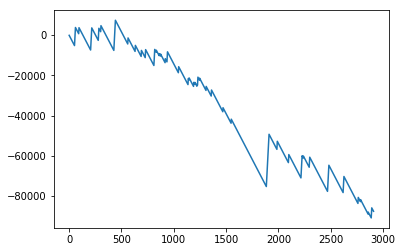

In [54]:
gorbe.plot()

In [55]:
gorbe.describe()

count     2911.000000
mean    -37806.423909
std      29631.694684
min     -90900.000000
25%     -65400.000000
50%     -36400.000000
75%      -8600.000000
max       7400.000000
Name: Cumulative_Profit, dtype: float64

In [56]:
gorbe.max()

7400

# 6. Feladat - Mi a legjobb modell, bemeno valtozo osszeallitas

Vegyél be, vagy készíts új változókat, összesen 10 darabot, majd vizsgáld meg, melyik modellel jön ki a legjobb profitérték. Érdemes lehet a k legközelebbi szomszéd illetve a döntési fa paramétereit állítani is.

In [57]:
def caravan_modellezo3(model,modelnev):
    """A függvény nem csak megjeleníti, hanem kimeneti változóként is kezeli az eredményeket.
    """
    model.fit(X_train,Y_train)
    
    result_prob = model.predict_proba(X_test)
    results = model.predict(X_test)
    
    acc = accuracy_score(Y_test, results)
    
    dfresults = pd.DataFrame(result_prob, columns=["Prob_0","Prob_1"])
    
    auc = auc_score(Y_test, dfresults["Prob_1"])
    
    print(modelnev + " hatekonysage: \tAcc="+str(acc)+"\tAUC="+str(auc))
    
    print("\nPrediction probabilities (dfresults):\n{}".format(dfresults.head()))
    return dfresults

In [58]:
df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

## 6. 1.

A célváltozó önmagában nem korrelál egy másik változóval sem:

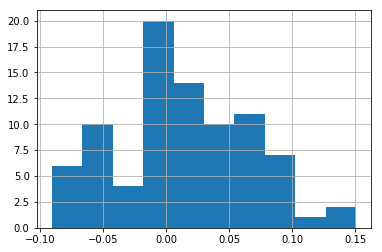

In [59]:
df.corr().CARAVAN[df.corr().CARAVAN != 1].hist()

Manuálisan szemezgetünk a kódleírásból:

In [60]:
X=df[['MOSTYPE', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'PWAPART', 'MINKGEM', 'MHKOOP', 'MAUT0', 'MAUT1', 'MAUT2']]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [61]:
logregres = caravan_modellezo3(m, "Logistic Regreesion")

Logistic Regreesion hatekonysage: 	Acc=0.9364479560288561	AUC=0.6630425730205627

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  0.974311  0.025689
1  0.943504  0.056496
2  0.983842  0.016158
3  0.937423  0.062577
4  0.984816  0.015184


In [62]:
gorbe,maxprofit=profitgorbe(Y_test,logregres['Prob_1'],1000,-100)

Max profit= 30500


Megnézzük, hogy vannak-e egymással korreláló változók, és kicseréljük őket.

In [63]:
cors = X.corr()
abs(cors)[(abs(cors) >= 0.7) & (cors != 1)].unstack().dropna().sort_values(ascending=False)

MOSHOOFD  MOSTYPE     0.992672
MOSTYPE   MOSHOOFD    0.992672
MAUT1     MAUT0       0.734564
MAUT0     MAUT1       0.734564
dtype: float64

In [64]:
X=df[['MOSTYPE', 'MGEMLEEF', 'MGODRK', 'PWAPART', 'MINKGEM', 'MHKOOP', 'MAUT0','MAUT2', 'APERSAUT', 'PAANHANG']]
Y=df['CARAVAN']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [65]:
logregres = caravan_modellezo3(m, "Logistic Regreesion")

Logistic Regreesion hatekonysage: 	Acc=0.9364479560288561	AUC=0.7150294461739803

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  0.978010  0.021990
1  0.948049  0.051951
2  0.988297  0.011703
3  0.919840  0.080160
4  0.965764  0.034236


In [66]:
gorbe,maxprofit=profitgorbe(Y_test,logregres['Prob_1'],1000,-100)

Max profit= 43100


A meglévők között nincsenek erősen korreláló változók:

In [67]:
cors = X.corr()
abs(cors)[(abs(cors) >= 0.5) & (cors != 1)].unstack().dropna().sort_values(ascending=False)

Series([], dtype: float64)

In [68]:
m = linear_model.LogisticRegression(C=1e5, class_weight='balanced')

In [69]:
logregres = caravan_modellezo3(m, "Logistic Regreesion")

Logistic Regreesion hatekonysage: 	Acc=0.7011336310546205	AUC=0.7258283595407587

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  0.732468  0.267532
1  0.558946  0.441054
2  0.836456  0.163544
3  0.429796  0.570204
4  0.491118  0.508882


In [70]:
gorbe,maxprofit=profitgorbe(Y_test,logregres['Prob_1'],1000,-100)

Max profit= 47500


### Döntési fa

In [71]:
dt = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=0.2)

In [72]:
km = KNeighborsClassifier(n_neighbors=5)

In [73]:
dectreeres = caravan_modellezo3(dt, "Decision Tree")

Decision Tree hatekonysage: 	Acc=0.9364479560288561	AUC=0.7086097836648094

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  0.970093  0.029907
1  0.967914  0.032086
2  0.991119  0.008881
3  0.967914  0.032086
4  0.895833  0.104167


In [74]:
gorbe, maxprofit = profitgorbe(Y_test,dectreeres['Prob_1'],1000,-100)

Max profit= 40100


### KNN

In [75]:
km = KNeighborsClassifier(n_neighbors=45)

In [76]:
knnres = caravan_modellezo3(km, "K Nearest Neighbors")

K Nearest Neighbors hatekonysage: 	Acc=0.9364479560288561	AUC=0.6435069699192957

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  1.000000  0.000000
1  0.955556  0.044444
2  1.000000  0.000000
3  0.955556  0.044444
4  0.955556  0.044444


In [77]:
gorbe,maxprofit=profitgorbe(Y_test,knnres['Prob_1'],1000,-100)

Max profit= 22000


# 7. Feladat - Eredmények összefoglalása

Összefoglalásként írd meg:
- Írd fel a neptunkódod, neved (opcionális)
- Milyen modellel
- Annak milyen paraméterbeállításával
- Milyen bemeneti változókkal érted el a legjobb eredményt
- Mutasd be az auc értéket és a profitgörbe maximumát is
- Irasd ki a profitgörbét mégegyszer

Novoszáth András

A legnagyobb profitgörbe értéket logisztikus regresszióval sikerült elérni, ennek paraméterei:
``` (C=1e5, class_weight='balanced')```.

Használt bemeneti változók: ```['MOSTYPE', 'MGEMLEEF', 'MGODRK', 'PWAPART', 'MINKGEM', 'MHKOOP', 'MAUT0', 'MAUT2', 'APERSAUT', 'PAANHANG']```.

In [78]:
logregres = caravan_modellezo3(m, "Logistic Regreesion")

Logistic Regreesion hatekonysage: 	Acc=0.7011336310546205	AUC=0.7258283595407587

Prediction probabilities (dfresults):
     Prob_0    Prob_1
0  0.732468  0.267532
1  0.558946  0.441054
2  0.836456  0.163544
3  0.429796  0.570204
4  0.491118  0.508882


In [79]:
gorbe,maxprofit=profitgorbe(Y_test,logregres['Prob_1'],1000,-100)

Max profit= 47500


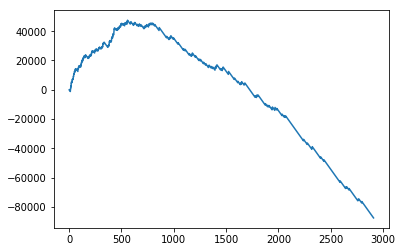

In [80]:
gorbe.plot()

In [81]:
gorbe.max()

47500